In [1]:
# Linear Discriminant Analysis -> LDA
# Supervised
# dimensionality reduction
# data is reduced but it is not losing its meaning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn import datasets

In [6]:
digits=datasets.load_digits()

In [7]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [14]:
digits.images[112]

array([[ 0.,  0.,  3., 11., 16., 13.,  0.,  0.],
       [ 0.,  3., 15., 15., 13., 16.,  0.,  0.],
       [ 0.,  6.,  8.,  2.,  9., 14.,  0.,  0.],
       [ 0.,  0.,  4.,  7., 15., 14.,  5.,  0.],
       [ 0.,  4., 16., 16., 16., 14.,  6.,  0.],
       [ 0.,  1.,  8., 13., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  1.,  0.,  0.,  0.]])

In [15]:
digits.target[112]

7

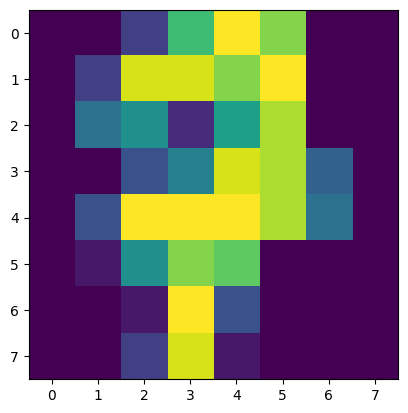

In [17]:
plt.imshow(digits.images[112])

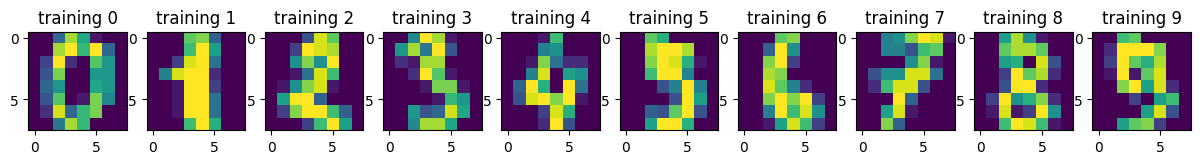

In [19]:
_,ax=plt.subplots(nrows=1,ncols=10, figsize=(15,15))
for ax,image,label in zip(ax, digits.images,digits.target):
  #ax.set_axis_off()
  ax.imshow(image)
  ax.set_title("training %i" %label)

In [20]:
digits.data.shape

(1797, 64)

In [22]:
digits.target[0]

0

In [23]:
digits.target[1]

1

In [24]:
digits.target[2]

2

In [25]:
digits.target[3]

3

In [26]:
digits.target[4]

4

In [27]:
digits.target[5]

5

In [28]:
digits.target[6]

6

In [29]:
digits.target[7]

7

In [30]:
digits.target[8]

8

In [31]:
digits.target[9]

9

In [32]:
digits.target[10]

0

In [33]:
digits.target[11]

1

In [34]:
digits.target[1000]

1

In [ ]:
digits.target[1001]

4

In [36]:
digits.data.shape

(1797, 64)

In [37]:
x=digits.data

In [38]:
y=digits.target

In [39]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [40]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [41]:
x_train,x_test, y_train, y_test  = train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
# feature scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [43]:
x_train.shape

(1437, 64)

In [44]:
lda=LinearDiscriminantAnalysis(n_components=9)
# 64 features, 10 classes(0-9)
# 10-1=9

In [45]:
x_train=lda.fit_transform(x_train,y_train)

In [47]:
x_test=lda.transform(x_test)

In [49]:
x_train.shape

(1437, 9)

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)

In [52]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [53]:
y_pred=rf.predict(x_test)

In [54]:
from sklearn.metrics import *
accuracy_score(y_test,y_pred)

0.9472222222222222

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.87      0.96      0.92        28
           2       0.97      0.97      0.97        33
           3       0.89      0.97      0.93        34
           4       0.94      0.98      0.96        46
           5       0.98      0.96      0.97        47
           6       1.00      0.97      0.99        35
           7       1.00      0.97      0.99        34
           8       0.90      0.87      0.88        30
           9       0.92      0.88      0.90        40

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



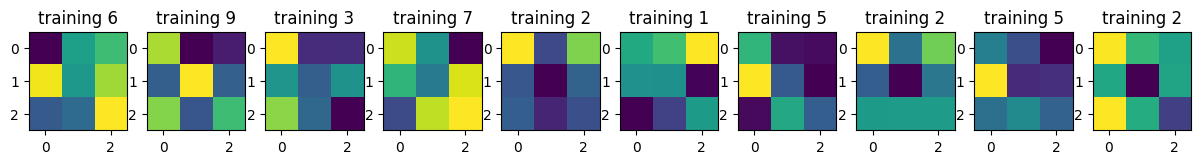

In [62]:
_,ax=plt.subplots(nrows=1,ncols=10, figsize=(15,15))
for ax,image,actual in zip(ax, x_test,y_test):
  image=image.reshape(3,3)
  #ax.set_axis_off()
  ax.imshow(image)
  ax.set_title("training %i" %actual)

Extra

In [ ]:
!pip install opencv-python


In [63]:
import cv2

In [73]:
a=cv2.imread("cat.jpg")

In [74]:
a

array([[[  6,   5,   7],
        [  6,   5,   7],
        [  6,   5,   7],
        ...,
        [ 16,  15,  17],
        [ 16,  16,  16],
        [ 16,  16,  16]],

       [[  5,   4,   6],
        [  6,   5,   7],
        [  5,   4,   6],
        ...,
        [ 16,  15,  17],
        [ 16,  16,  16],
        [ 16,  16,  16]],

       [[  5,   4,   6],
        [  5,   4,   6],
        [  5,   4,   6],
        ...,
        [ 17,  16,  18],
        [ 17,  17,  17],
        [ 17,  17,  17]],

       ...,

       [[ 59,  83, 129],
        [ 59,  83, 129],
        [ 59,  83, 129],
        ...,
        [ 22,  41,  84],
        [ 22,  41,  84],
        [ 20,  39,  82]],

       [[ 57,  81, 127],
        [ 58,  82, 128],
        [ 58,  81, 129],
        ...,
        [ 22,  42,  83],
        [ 22,  42,  83],
        [ 20,  40,  81]],

       [[ 56,  80, 126],
        [ 57,  81, 127],
        [ 57,  80, 128],
        ...,
        [ 22,  42,  83],
        [ 22,  42,  83],
        [ 20,  40,  81]]

In [75]:
a.shape

(1500, 1000, 3)

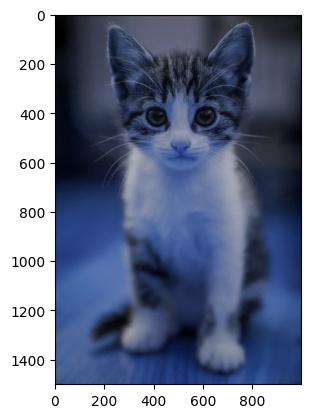

In [76]:
plt.imshow(a)

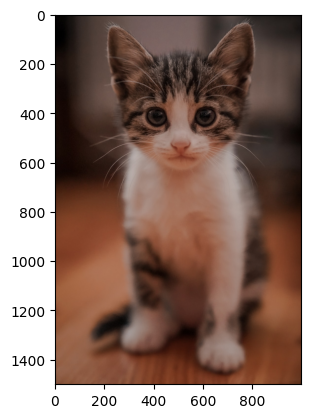

In [77]:
plt.imshow(a[:,:,::-1])
# color_rgb2bgr

In [71]:
# resize
a1=cv2.resize(a, (50,50))

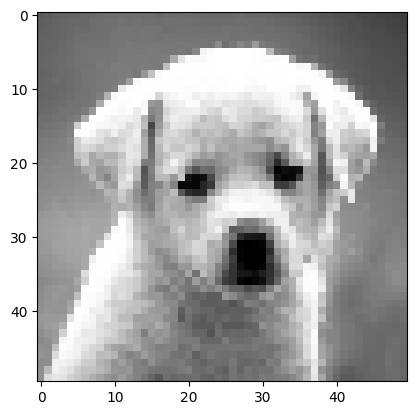

In [72]:
plt.imshow(a1[:,:,::-1])
